In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

## Load Model

In [2]:
model_to_test = load_model("grape-vision-model-prototype.h5")

In [3]:
# get labels

labels = list()
class_list = os.listdir(os.path.join('./', 'train'))

for each_class in class_list: labels.append(each_class)

label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(labels)

label_binarizer.classes_

array(['healthy', 'unhealthy'], dtype='<U9')

## Predict

In [4]:
def prediction(image_path):
    temp_image = load_img(image_path, target_size = (256, 256))
    image_array = img_to_array(temp_image)
    scaled_image = np.array(image_array, dtype = np.float16) / 255
    scaled_image = np.expand_dims(scaled_image,0)
    probability = model_to_test.predict(scaled_image)
    prediction = (probability > 0.5).astype("int32")
    return temp_image, probability[0][0], label_binarizer.classes_[prediction][0][0]


In [5]:
def showme():
    demo_dir = os.path.join('./', 'demo')
    image_names = os.listdir(f"{demo_dir}/")
    for each_image in image_names:
        image, probability, health_prediction = prediction(f"./demo/{each_image}")
        if probability < 0.5:
            probability = 1 - probability
        print('\nThis leaf is', health_prediction, 'with', round(probability * 100, 2), '% certainty.\n')
        plt.figure()
        plt.imshow(image)
        plt.show() 
        print("\n\n")



This leaf is healthy with 99.95 % certainty.



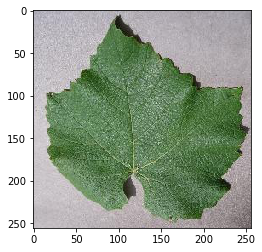





This leaf is healthy with 99.95 % certainty.



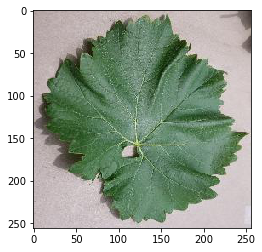





This leaf is healthy with 99.94 % certainty.



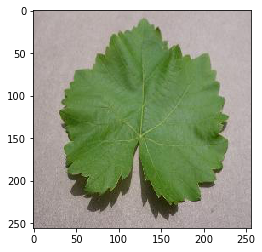





This leaf is unhealthy with 100.0 % certainty.



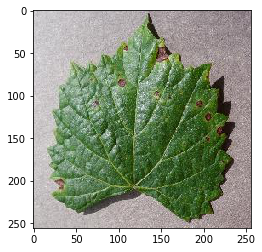





This leaf is unhealthy with 100.0 % certainty.



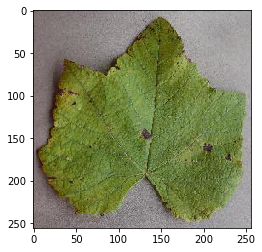





This leaf is unhealthy with 100.0 % certainty.



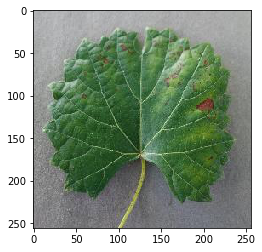

In [7]:
showme()